# Loading images from the Quick Draw Dataset 5k examples


get the data at https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap?pli=1


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import keras.backend as K

import tensorflow as tf

import os
import pickle
import numpy as np

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.8
1.3.0


In [3]:
num_examples_per_class = 5000

classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe',
      'banana','bandage','barn','baseball bat','baseball','basket',
      'basketball','bathtub','beach','bear','beard','bed','bee','belt',
     'bicycle','binoculars','birthday cake','blueberry','book',
      'boomerang','bottlecap','bowtie','bracelet','brain','bread','broom',
      'bulldozer','bus','bush','butterfly','cactus','cake','calculator',
      'calendar','camel','camera','campfire','candle','cannon','canoe',
      'car','carrot','cello','computer','cat','chandelier','clock','cloud',
      'coffee cup','compass','cookie','couch','cow','crab',
      'crayon','crocodile','crown','cup','diamond','dog','dolphin',
      'donut','dragon','dresser','drill','drums','duck','dumbbell','ear',
      'elbow','elephant','envelope','eraser','eye','eyeglasses','face',
      'fan','feather','fence','finger','fire hydrant','fireplace','firetruck',
      'fish','flamingo','flashlight','flip flops','floor lamp',
      'flower','flying saucer','foot','fork']

In [4]:
len(classes)

100

In [5]:
classes40 = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe',
                  'banana','bandage','barn','baseball bat','baseball','basket',
                  'basketball','bathtub','beach','bear','beard','bed','bee','belt',
                  'bicycle','binoculars','birthday cake','blueberry',
                  'book','boomerang','bottlecap','bowtie','bracelet','brain',
                  'bread','broom','bulldozer','bus','bush','butterfly','cactus','cake']

In [6]:
classes60 = [x for x in classes if x not in classes40]

In [7]:
len(classes60)

60

## Load the image data from scratch

Only use if you are downloading the raw data and doing it yourself

In [8]:
#This cell is only if you are loading the data from scratch
# get the data 
quickdraws = [np.load("../../data/{}.npy".format(qdraw))[:num_examples_per_class] for qdraw in classes]

# Concat the arrays together
x_data = np.concatenate(quickdraws,axis=0)

x_data.shape

FileNotFoundError: [Errno 2] No such file or directory: '../../data/airplane.npy'

In [9]:
np.save('x_data_100_classes_5k.npy',x_data)

NameError: name 'x_data' is not defined

## Use this cell to load the premade datasets that I made

In [9]:
x_data = np.load("./x_data_100_classes_5k.npy")

In [10]:
x_data.shape

(500000, 784)

In [11]:
x_data = x_data[200000:]
x_data.shape

(300000, 784)

## Lets make some labels for our data

In [11]:
#labels = [np.full((num_examples_per_class,), classes.index(qdraw)) for qdraw in classes if qdraw in classes60]

## Concat the arrays together
#y_data = np.concatenate(labels,axis=0)
#y_data.shape

In [12]:
labels = [np.full((num_examples_per_class,), classes60.index(qdraw)) for qdraw in classes60]

## Concat the arrays together
y_data = np.concatenate(labels,axis=0)
y_data.shape

(300000,)

## lets look at the Images 

In [13]:
def show_object(obj):
    # Reshape 784 array into 28x28 image
    image = obj.reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(image, cmap='gray_r')
    plt.show()

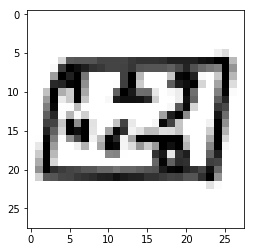

1


In [14]:
show_object(x_data[5555])
print(y_data[5555])

In [15]:
classes60[1]

'calendar'

In [16]:
#shuffling function
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [17]:
x_data,y_data = unison_shuffled_copies(x_data,y_data)

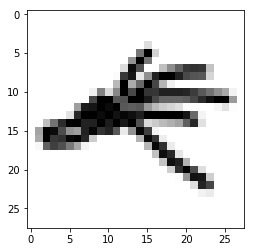

53


In [18]:
eg = 11

show_object(x_data[eg])
print(y_data[eg])

In [19]:
classes60[53]

'flashlight'

# Prep Model

In [20]:
batch_size = 256
num_classes = 60
epochs = 10

#dataset = "fashion" # or "numbers"

# input image dimensions
img_rows, img_cols = 28, 28

In [21]:
x_data.shape, y_data.shape

((300000, 784), (300000,))

In [22]:
x_train = x_data[:250000]
x_test = x_data[250000:]

y_train = y_data[:250000]
y_test = y_data[250000:]

In [23]:
# reshape the data into format (width, Height, channels)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [24]:
input_shape

(28, 28, 1)

In [25]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (250000, 28, 28, 1)
250000 train samples
50000 test samples


In [26]:
x_test.shape, y_test.shape, y_train.shape

((50000, 28, 28, 1), (50000,), (250000,))

In [27]:
y_train[0]

49

# Load Model

In [28]:
base_model = load_model('a2-40b.h5')

In [29]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 10, 10, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
__________

In [30]:
base_model.layers.pop()

In [31]:
base_model.layers.pop()

In [32]:
base_model.layers.pop()

In [33]:
base_model.layers.pop()

In [34]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 10, 10, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
__________

In [35]:
for l in base_model.layers:
    l.trainable=False

In [36]:
for l in base_model.layers:
    print(l.name,l.trainable)

input_1 False
Conv_01 False
Conv_02 False
MaxPool_01 False
Dropout_01 False
Conv_03 False
batch_normalization_1 False
MaxPool_02 False
Flatten_01 False


In [37]:
base_model.layers[-1].name

'Flatten_01'

In [38]:
# add 2 dense and a dropout layer
xt = base_model.layers[-1].output
xt = Dropout(0.2,name = 'Dropout_03')(xt)
#y = BatchNormalization(name='batchnorm_train')(y)
# let's add a fully-connected layer
xt = BatchNormalization(name='batchnorm_train')(Dense(128, activation='relu', name = 'Dense_train01')(xt))
#xt = Dropout(0.2,name = 'Dropout_03')(xt)
#x = Dense(128, activation='relu', name = 'Dense_train02')(x)
# and a softmax for output
final = Dense(num_classes, activation='softmax',name = 'Dense_softmax')(xt)


In [39]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=final)

In [40]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 10, 10, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
__________

In [42]:
for l in model.layers:
    print(l.name,l.trainable)

input_1 False
Conv_01 False
Conv_02 False
MaxPool_01 False
Dropout_01 False
Conv_03 False
batch_normalization_1 False
MaxPool_02 False
Flatten_01 False
Dropout_03 True
Dense_train01 True
batchnorm_train True
Dense_softmax True


In [43]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks = None,
          validation_data=(x_test, y_test))

ValueError: Error when checking target: expected Dense_softmax to have shape (None, 60) but got array with shape (250000, 1)

In [44]:
evaluation = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Model Accuracy = {:.2f} %'.format(evaluation[1]*100))
print('Model Loss = {:05.2f}'.format(evaluation[0]))

ValueError: Error when checking target: expected Dense_softmax to have shape (None, 60) but got array with shape (50000, 1)

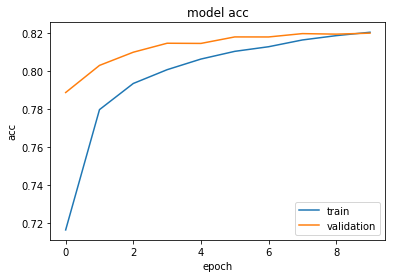

In [46]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    
plot_train(hist)